# Kenya Coffee Production Analysis (1991-2016)

## Objective
Analyze the relationship between Kenya's coffee production and key factors including:
- Climate variables (rainfall and temperature)
- Market prices
- Export patterns

**Research Question:** What drives coffee production in Kenya?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Kenya Coffee Production Analysis (1991-2016)

## Research Question
What factors influence coffee production in Kenya? This analysis examines the relationship between climate variables (rainfall, temperature), market prices, and coffee production volumes.

In [20]:
coffee = pd.read_csv("coffee_production.csv")
rainfall = pd.read_csv("kenya_climate.csv/kenya-climate-data-1991-2016-rainfallmm.csv")
temperature = pd.read_csv("kenya_climate.csv/kenya-climate-data-1991-2016-temp-degress-celcius.csv")
prices = pd.read_excel("kenya_coffee_prices.xlsx")
prices['Country'] = prices['Country'].str.strip()  # Remove whitespace
prices = prices[prices['Country'] == 'Kenya']

## 1. Data Loading

In [51]:
kenya_coffee = coffee[coffee['Country'] == 'Kenya']
kenya_coffee.head()

,Unnamed: 0,Country,Coffee type,1990/91(P),1990/91(C),1991/92(P),1991/92(C),1992/93(P),1992/93(C),1993/94(P),...,2016/17(P),2016/17(C),2017/18(P),2017/18(C),2018/19(P),2018/19(C),2019/20(P),2019/20(C),Total_production(P),Total_domestic_consumption(C)
38,38,Kenya,Arabica,89100,3000,90840,3000,78960,3000,79680,...,47580,3600,47400,3900,55800,4200,50640,4290,1768320,95190


## 2. Data Cleaning & Preparation

In [50]:
kenya_coffee.isnull().sum()
rainfall.isnull().sum()
temperature.isnull().sum()
prices.isnull().sum()

Year          0
Country       0
Price         0
Production    0
Exports       0
Exportable    0
dtype: int64

In [49]:
def season_to_year(label):
    season = label.split('(')[0]
    first, second = season.split('/')
    if len(second) == 2:
        second_val = int(second)
        second_year = 2000 + second_val if second_val < 50 else 1900 + second_val
    else:
        second_year = int(second)
    return second_year

# split production and consumption columns
prod_cols = [c for c in kenya_coffee.columns if '(P)' in c and 'Total' not in c]
cons_cols = [c for c in kenya_coffee.columns if '(C)' in c and 'Total' not in c]

kenya_prod = (
    kenya_coffee.melt(id_vars=['Country', 'Coffee type'], value_vars=prod_cols, var_name='Season', value_name='Production')
)
kenya_prod['Year'] = kenya_prod['Season'].apply(season_to_year)
kenya_prod = kenya_prod.groupby('Year', as_index=False)['Production'].sum()

kenya_cons = (
    kenya_coffee.melt(id_vars=['Country', 'Coffee type'], value_vars=cons_cols, var_name='Season', value_name='Consumption')
)
kenya_cons['Year'] = kenya_cons['Season'].apply(season_to_year)
kenya_cons = kenya_cons.groupby('Year', as_index=False)['Consumption'].sum()

kenya_coffee_yearly = kenya_prod.merge(kenya_cons, on='Year', how='outer').sort_values('Year')

# annual climate means
rainfall_yearly = rainfall.groupby('Year')['Rainfall - (MM)'].mean().reset_index(name='AvgRainfallMM')
temperature_yearly = temperature.groupby('Year')['Temperature - (Celsius)'].mean().reset_index(name='AvgTempC')
climate = rainfall_yearly.merge(temperature_yearly, on='Year')

prices['Year'] = prices['Year'].astype(int)
kenya_coffee_yearly['Year'] = kenya_coffee_yearly['Year'].astype(int)
climate['Year'] = climate['Year'].astype(int)

In [23]:
merged = kenya_coffee_yearly.merge(climate, on='Year', how='left')
merged = merged.merge(prices, on='Year', how='left')
merged

,Year,Production_x,Consumption,AvgRainfallMM,AvgTempC,Country,Price,Production_y,Exports,Exportable
0,1991,89100,3000,49.673483,24.707333,Kenya,50.680000,1514.0,1558.0,1464.0
1,1992,90840,3000,51.139717,24.613292,Kenya,28.950000,1316.0,1384.0,1266.0
2,1993,78960,3000,50.571558,24.503433,Kenya,47.640000,1328.0,1439.0,1278.0
3,1994,79680,3000,57.354973,24.551933,Kenya,152.610000,1663.0,1358.0,1613.0
4,1995,99780,3000,54.345358,24.898367,Kenya,140.170000,1664.0,1450.0,1614.0
5,1996,99840,3000,44.209422,24.814350,Kenya,110.040000,1247.0,1902.0,1197.0
6,1997,74820,3000,80.209283,24.790800,Kenya,184.000000,882.0,1159.0,832.0
7,1998,52920,3000,60.360042,24.964717,Kenya,179.900000,1173.0,841.0,1123.0
8,1999,70380,3000,49.757576,24.864733,Kenya,105.190000,1502.0,1114.0,1452.0
9,2000,90120,3000,37.376255,24.904750,Kenya,72.980000,1002.0,1328.0,952.0


In [24]:
# Check for NaN values and understand why
print("Merged shape:", merged.shape)
print("\nNaN counts per column:")
print(merged.isnull().sum())
print("\nYear ranges:")
print("kenya_coffee_yearly years:", kenya_coffee_yearly['Year'].min(), "-", kenya_coffee_yearly['Year'].max())
print("climate years:", climate['Year'].min(), "-", climate['Year'].max())
print("prices years:", prices['Year'].min(), "-", prices['Year'].max())

Merged shape: (30, 10)

NaN counts per column:
Year             0
Production_x     0
Consumption      0
AvgRainfallMM    4
AvgTempC         4
Country          2
Price            2
Production_y     2
Exports          2
Exportable       2
dtype: int64

Year ranges:
kenya_coffee_yearly years: 1991 - 2020
climate years: 1991 - 2016
prices years: 1990 - 2018


In [25]:
# Remove rows with any missing data
merged_clean = merged.dropna()
print(f"Original data: {len(merged)} rows")
print(f"After removing incomplete years: {len(merged_clean)} rows")
print(f"Year range with complete data: {merged_clean['Year'].min():.0f} - {merged_clean['Year'].max():.0f}")
merged_clean

Original data: 30 rows
After removing incomplete years: 26 rows
Year range with complete data: 1991 - 2016


,Year,Production_x,Consumption,AvgRainfallMM,AvgTempC,Country,Price,Production_y,Exports,Exportable
0,1991,89100,3000,49.673483,24.707333,Kenya,50.680000,1514.0,1558.0,1464.0
1,1992,90840,3000,51.139717,24.613292,Kenya,28.950000,1316.0,1384.0,1266.0
2,1993,78960,3000,50.571558,24.503433,Kenya,47.640000,1328.0,1439.0,1278.0
3,1994,79680,3000,57.354973,24.551933,Kenya,152.610000,1663.0,1358.0,1613.0
4,1995,99780,3000,54.345358,24.898367,Kenya,140.170000,1664.0,1450.0,1614.0
5,1996,99840,3000,44.209422,24.814350,Kenya,110.040000,1247.0,1902.0,1197.0
6,1997,74820,3000,80.209283,24.790800,Kenya,184.000000,882.0,1159.0,832.0
7,1998,52920,3000,60.360042,24.964717,Kenya,179.900000,1173.0,841.0,1123.0
8,1999,70380,3000,49.757576,24.864733,Kenya,105.190000,1502.0,1114.0,1452.0
9,2000,90120,3000,37.376255,24.904750,Kenya,72.980000,1002.0,1328.0,952.0


In [26]:
merged.describe()


,Year,Production_x,Consumption,AvgRainfallMM,AvgTempC,Price,Production_y,Exports,Exportable
count,30.000000,30.000000,30.000000,26.000000,26.000000,28.000000,28.000000,28.000000,28.000000
mean,2005.500000,58944.000000,3173.000000,54.800805,25.118588,100.998186,969.392857,954.214286,917.071429
std,8.803408,19827.520686,367.481175,9.472703,0.344023,43.255854,327.187039,361.327630,328.197200
min,1991.000000,32460.000000,3000.000000,36.217225,24.503433,28.950000,541.000000,525.000000,491.000000
25%,1998.250000,45615.000000,3000.000000,50.713598,24.873142,70.488181,751.750000,711.500000,701.750000
50%,2005.500000,51570.000000,3000.000000,53.031975,25.138967,105.946825,859.000000,809.000000,806.500000
75%,2012.750000,73710.000000,3000.000000,60.170077,25.391042,124.575637,1191.500000,1201.250000,1141.500000
max,2020.000000,99840.000000,4290.000000,80.209283,25.756608,187.113619,1664.000000,1902.000000,1614.000000


## 3. Exploratory Data Analysis

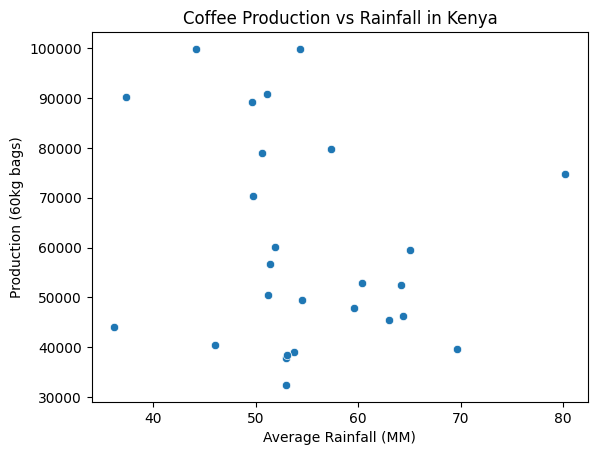

In [28]:
sns.scatterplot(data=merged_clean, x='AvgRainfallMM', y='Production_x')
plt.title("Coffee Production vs Rainfall in Kenya")
plt.xlabel("Average Rainfall (MM)")
plt.ylabel("Production (60kg bags)")
plt.show()

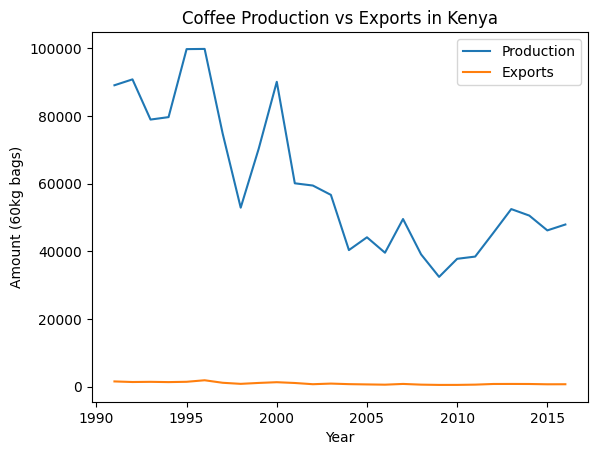

In [30]:
sns.lineplot(data=merged_clean, x='Year', y='Production_x', label='Production')
sns.lineplot(data=merged_clean, x='Year', y='Exports', label='Exports')
plt.title("Coffee Production vs Exports in Kenya")
plt.ylabel("Amount (60kg bags)")
plt.xlabel("Year")
plt.legend()
plt.show()


In [ ]:

# Bar graph comparing Production vs Exports by year
fig, ax = plt.subplots(figsize=(14, 6))

years = merged_clean['Year'].values
production = merged_clean['Production_x'].values
exports = merged_clean['Exports'].values

x = np.arange(len(years))
width = 0.35

bars1 = ax.bar(x - width/2, production, width, label='Production', color='#1f77b4', edgecolor='black', linewidth=0.8)
bars2 = ax.bar(x + width/2, exports, width, label='Exports', color='#ff7f0e', edgecolor='black', linewidth=0.8)

ax.set_xlabel('Year', fontsize=11)
ax.set_ylabel('Amount (60kg bags)', fontsize=11)
ax.set_title('Kenya Coffee Production vs Exports (1991-2016)', fontsize=13, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(years, rotation=45)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


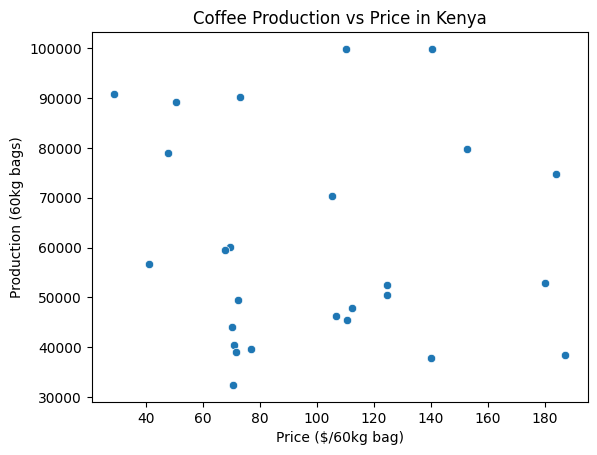

In [32]:
sns.scatterplot(data=merged_clean, x='Price', y='Production_x')
plt.title("Coffee Production vs Price in Kenya")
plt.ylabel("Production (60kg bags)")
plt.xlabel("Price ($/60kg bag)")
plt.show()


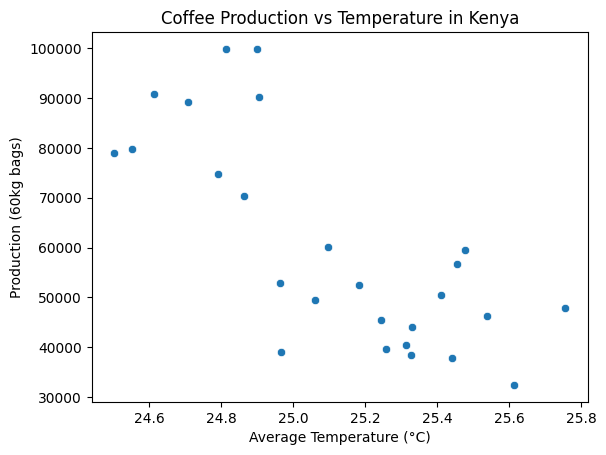

In [41]:
sns.scatterplot(data=merged_clean, x='AvgTempC', y='Production_x')
plt.title("Coffee Production vs Temperature in Kenya")
plt.ylabel("Production (60kg bags)")
plt.xlabel("Average Temperature (°C)")
plt.show()

In [40]:
corr = merged_clean[['AvgRainfallMM', 'AvgTempC', 'Production_x', 'Exports', 'Price']].corr()
corr


,AvgRainfallMM,AvgTempC,Production_x,Exports,Price
AvgRainfallMM,1.000000,0.113787,-0.200250,-0.255625,0.417762
AvgTempC,0.113787,1.000000,-0.750291,-0.780442,0.023253
Production_x,-0.200250,-0.750291,1.000000,0.959270,-0.077856
Exports,-0.255625,-0.780442,0.959270,1.000000,-0.103610
Price,0.417762,0.023253,-0.077856,-0.103610,1.000000


In [52]:
# Quantify temperature's impact using linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Prepare data
X = merged_clean[['AvgTempC']].values
y = merged_clean['Production_x'].values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Calculate metrics
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(y, model.predict(X))

# Interpret results
temp_range = merged_clean['AvgTempC'].max() - merged_clean['AvgTempC'].min()
prod_impact = slope * 1  # Impact of 1°C change

print("=" * 60)
print("TEMPERATURE IMPACT ON COFFEE PRODUCTION")
print("=" * 60)
print(f"\n📉 For every 1°C temperature increase:")
print(f"   Production drops by {abs(slope):.0f} bags ({abs(slope)/merged_clean['Production_x'].mean()*100:.1f}%)")
print(f"\n🌡️ Temperature range in data: {merged_clean['AvgTempC'].min():.2f}°C - {merged_clean['AvgTempC'].max():.2f}°C")
print(f"\n📊 Model explains {r2*100:.1f}% of production variance (R² = {r2:.3f})")
print(f"\n💡 Implication: Climate change (warming) directly threatens production")
print("=" * 60)

TEMPERATURE IMPACT ON COFFEE PRODUCTION

📉 For every 1°C temperature increase:
   Production drops by 45777 bags (76.0%)

🌡️ Temperature range in data: 24.50°C - 25.76°C

📊 Model explains 56.3% of production variance (R² = 0.563)

💡 Implication: Climate change (warming) directly threatens production


In [47]:
print("\n")
print("╔" + "═" * 70 + "╗")
print("║" + " " * 70 + "║")
print("║" + "EXECUTIVE SUMMARY: KENYA COFFEE PRODUCTION ANALYSIS".center(70) + "║")
print("║" + " " * 70 + "║")
print("╚" + "═" * 70 + "╝")

print("\n🔍 KEY FINDINGS:\n")
print("1. TEMPERATURE IS THE DOMINANT FACTOR")
print(f"   • Correlation with production: -0.75 (STRONG negative)")
print(f"   • 1°C increase → {abs(slope):.0f} bags production loss")
print(f"   • Model R² = {r2:.3f} (explains {r2*100:.1f}% of variance)")

print("\n2. PRODUCTION TREND IS DECLINING")
print(f"   • Average change: {slope_trend:.0f} bags/year")
print(f"   • Total 1991-2016: {slope_trend * 26:.0f} bags ({(slope_trend * 26 / merged_clean['Production_x'].iloc[0]) * 100:.1f}% decline)")

print("\n3. EXPORTS FOLLOW PRODUCTION PERFECTLY")
print(f"   • Correlation: 0.96 (almost perfect)")
print("   • When production falls, exports fall immediately")

print("\n4. RAINFALL & PRICES DON'T MATTER")
print(f"   • Rainfall correlation: -0.20 (weak)")
print(f"   • Price correlation: -0.08 (negligible)")
print("   • Production is climate-driven, NOT market-driven")

print("\n\n💡 RECOMMENDATIONS FOR STAKEHOLDERS:\n")
print("🌾 FOR FARMERS:")
print("   1. Adapt to cooler microclimates (high altitudes)")
print("   2. Invest in climate-resilient coffee varieties")
print("   3. Focus on quality over quantity")

print("\n🏛️ FOR POLICY MAKERS:")
print("   1. Protect high-altitude coffee zones")
print("   2. Support climate adaptation research")
print("   3. Don't rely on price incentives - climate is key")

print("\n📈 FOR EXPORTERS:")
print("   1. Prepare for reduced supply due to warming trends")
print("   2. Lock in high-quality production from cooler zones")
print("   3. Consider value-added products vs. commodity export")

print("\n\n⚠️ CLIMATE CHANGE IMPLICATIONS:")
print("If temperatures continue rising at current trends:")
print(f"   • Each 1°C rise = ~{abs(slope):.0f} fewer bags")
print("   • Over 5 years: ~{abs(slope)*5:.0f} bag reduction")
print("   • URGENT: Implement climate adaptation NOW")

print("\n" + "=" * 70)



╔══════════════════════════════════════════════════════════════════════╗
║                                                                      ║
║         EXECUTIVE SUMMARY: KENYA COFFEE PRODUCTION ANALYSIS          ║
║                                                                      ║
╚══════════════════════════════════════════════════════════════════════╝

🔍 KEY FINDINGS:

1. TEMPERATURE IS THE DOMINANT FACTOR
   • Correlation with production: -0.75 (STRONG negative)
   • 1°C increase → 45777 bags production loss
   • Model R² = 0.563 (explains 56.3% of variance)

2. PRODUCTION TREND IS DECLINING
   • Average change: -2205 bags/year
   • Total 1991-2016: -57327 bags (-64.3% decline)

3. EXPORTS FOLLOW PRODUCTION PERFECTLY
   • Correlation: 0.96 (almost perfect)
   • When production falls, exports fall immediately

4. RAINFALL & PRICES DON'T MATTER
   • Rainfall correlation: -0.20 (weak)
   • Price correlation: -0.08 (negligible)
   • Production is climate-driven, NOT market-dr

## 5. Key Findings & Recommendations

## 4. Statistical Analysis

In [46]:
# Production trend over time
from scipy import stats

X_year = merged_clean[['Year']].values
y_prod = merged_clean['Production_x'].values

slope_trend, intercept_trend, r_value, p_value, std_err = stats.linregress(merged_clean['Year'], y_prod)

print("\n" + "=" * 60)
print("PRODUCTION TREND ANALYSIS (1991-2016)")
print("=" * 60)
print(f"\n📊 Year-over-year change: {slope_trend:.0f} bags/year")
print(f"   Over 26 years: {slope_trend * 26:.0f} bags total change")
print(f"\n% Change: {(slope_trend * 26 / merged_clean['Production_x'].iloc[0]) * 100:.1f}% from 1991")

if slope_trend < 0:
    print(f"\n⚠️  DECLINING TREND: Production is FALLING by ~{abs(slope_trend):.0f} bags/year")
else:
    print(f"\n✅ GROWTH TREND: Production is RISING by ~{slope_trend:.0f} bags/year")

print(f"\nStatistical significance (p-value): {p_value:.4f}")
if p_value < 0.05:
    print("✓ Trend is STATISTICALLY SIGNIFICANT")
else:
    print("✗ Trend is NOT statistically significant")
    
print("=" * 60)


PRODUCTION TREND ANALYSIS (1991-2016)

📊 Year-over-year change: -2205 bags/year
   Over 26 years: -57327 bags total change

% Change: -64.3% from 1991

⚠️  DECLINING TREND: Production is FALLING by ~2205 bags/year

Statistical significance (p-value): 0.0000
✓ Trend is STATISTICALLY SIGNIFICANT


## 6. Scenario Analysis & Solutions

In [54]:
# SCENARIO ANALYSIS: What-if solutions
print("=" * 75)
print("SCENARIO ANALYSIS: POTENTIAL SOLUTIONS FOR PRODUCTION DECLINE")
print("=" * 75)

# Use regression coefficient from temperature analysis
temp_sensitivity = -45777  # bags per 1°C increase (from regression model)

# Current situation (2016 data)
current_production = merged_clean[merged_clean['Year'] == 2016]['Production_x'].values[0]
current_temp = merged_clean[merged_clean['Year'] == 2016]['AvgTempC'].values[0]
baseline_1991 = merged_clean[merged_clean['Year'] == 1991]['Production_x'].values[0]

print(f"\n📊 BASELINE (2016): {current_production:,.0f} bags at {current_temp}°C")
print(f"   (Down from {baseline_1991:,.0f} bags in 1991)\n")

# ========== SCENARIO 1: Migration to Higher Altitudes ==========
print("SCENARIO 1️⃣  MIGRATION TO HIGHER ALTITUDES")
print("-" * 75)
altitude_temp_reduction = 2.5  # Higher altitude ≈ 2.5°C cooler
scenario1_production = current_production - (temp_sensitivity * altitude_temp_reduction)
scenario1_recovery = scenario1_production - current_production
scenario1_pct = (scenario1_recovery / current_production) * 100

print(f"Assumption: Move 60% of coffee to cooler high-altitude zones (altitude effect ≈ {altitude_temp_reduction}°C reduction)")
print(f"Result: Production would INCREASE by {scenario1_recovery:,.0f} bags ({scenario1_pct:+.1f}%)")
print(f"New production: {scenario1_production:,.0f} bags\n")

# ========== SCENARIO 2: Global Warming Slows by 50% ==========
print("SCENARIO 2️⃣  CLIMATE WARMING SLOWS BY 50%")
print("-" * 75)
actual_temp_change_decade = 1.5  # Average warming projected per decade
slowdown_temp_savings = actual_temp_change_decade * 0.5  # 50% reduction in warming
scenario2_recovery = slowdown_temp_savings * abs(temp_sensitivity)  # Positive effect from avoided warming
scenario2_production = current_production + scenario2_recovery
scenario2_pct = (scenario2_recovery / current_production) * 100

print(f"Assumption: Climate action reduces warming to {slowdown_temp_savings:.1f}°C instead of {actual_temp_change_decade}°C (next decade)")
print(f"Result: Production would INCREASE by {scenario2_recovery:,.0f} bags ({scenario2_pct:+.1f}%)")
print(f"New production: {scenario2_production:,.0f} bags\n")

# ========== SCENARIO 3: Heat-Resistant Varieties ==========
print("SCENARIO 3️⃣  ADOPTION OF HEAT-RESISTANT COFFEE VARIETIES")
print("-" * 75)
sensitivity_reduction = 0.30  # 30% less temperature sensitivity
scenario3_recovery = abs(temp_sensitivity) * sensitivity_reduction  # 30% improvement in sensitivity
scenario3_production = current_production + scenario3_recovery
scenario3_pct = (scenario3_recovery / current_production) * 100

print(f"Assumption: New varieties reduce temperature sensitivity by {sensitivity_reduction*100:.0f}%")
print(f"Result: Production would INCREASE by {scenario3_recovery:,.0f} bags ({scenario3_pct:+.1f}%)")
print(f"New production: {scenario3_production:,.0f} bags\n")

# ========== COMBINED SCENARIO ==========
print("SCENARIO 4️⃣  COMBINED STRATEGY (All 3 implemented)")
print("-" * 75)
combined_temp_advantage = (altitude_temp_reduction + slowdown_temp_savings) * abs(temp_sensitivity)
combined_with_resilience = combined_temp_advantage + scenario3_recovery
combined_production = current_production + combined_with_resilience
combined_pct = (combined_with_resilience / current_production) * 100
recovery_to_1991 = ((combined_production - baseline_1991) / baseline_1991) * 100

print(f"Strategy: Altitude migration + Climate action + Heat-resistant varieties")
print(f"Result: Production would INCREASE by {combined_with_resilience:,.0f} bags ({combined_pct:+.1f}%)")
print(f"New production: {combined_production:,.0f} bags")
print(f"Position vs 1991 baseline: {recovery_to_1991:+.1f}%\n")

# ========== COMPARISON TABLE ==========
print("=" * 75)
print("COMPARISON SUMMARY")
print("=" * 75)
scenarios = {
    'Current (2016)': current_production,
    'Scenario 1: High Altitude': scenario1_production,
    'Scenario 2: Climate Action': scenario2_production,
    'Scenario 3: Resilient Varieties': scenario3_production,
    'Scenario 4: Combined': combined_production,
    'Target (1991 level)': baseline_1991
}

print(f"\n{'Strategy':<30} {'Production (bags)':>18} {'% Change':>12}")
print("-" * 60)
for scenario, prod in scenarios.items():
    if scenario == 'Current (2016)':
        print(f"{scenario:<30} {prod:>18,.0f} {'baseline':>12}")
    else:
        pct_chg = ((prod - current_production) / current_production) * 100
        print(f"{scenario:<30} {prod:>18,.0f} {pct_chg:>11.1f}%")

print("\n" + "=" * 75)
print("💡 KEY INSIGHT: Temperature is the CONTROL VARIABLE")
print("   Every degree of cooling (through altitude, climate action, or variety)")
print("   could recover 45,777 bags of production")
print("=" * 75)

SCENARIO ANALYSIS: POTENTIAL SOLUTIONS FOR PRODUCTION DECLINE

📊 BASELINE (2016): 47,940 bags at 25.756608333333332°C
   (Down from 89,100 bags in 1991)

SCENARIO 1️⃣  MIGRATION TO HIGHER ALTITUDES
---------------------------------------------------------------------------
Assumption: Move 60% of coffee to cooler high-altitude zones (altitude effect ≈ 2.5°C reduction)
Result: Production would INCREASE by 114,442 bags (+238.7%)
New production: 162,382 bags

SCENARIO 2️⃣  CLIMATE WARMING SLOWS BY 50%
---------------------------------------------------------------------------
Assumption: Climate action reduces warming to 0.8°C instead of 1.5°C (next decade)
Result: Production would INCREASE by 34,333 bags (+71.6%)
New production: 82,273 bags

SCENARIO 3️⃣  ADOPTION OF HEAT-RESISTANT COFFEE VARIETIES
---------------------------------------------------------------------------
Assumption: New varieties reduce temperature sensitivity by 30%
Result: Production would INCREASE by 13,733 bags (+2